In [13]:
sess.close()

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

from keras.models import Model

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [3]:
from Keras_Modules import *

In [4]:
X_train, X_test = load_data()

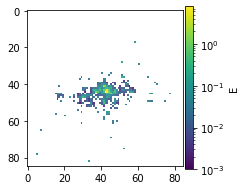

In [5]:
rcParams['figure.figsize'] = 3,3
plot_img(X_train[0])

### First model - Fully Connected Network 

### Parameters

In [ ]:
# of nodes in each layer 
n_nodes_inpl = 85*85   #encoder, input layer
n_nodes_hl1  = 140  #encoder, first hidden layer 
n_nodes_hl2  = 140 #decoder, second hiddel layer 
n_nodes_outl = 85*85   #decoder, output layer

# setting up the params 
shape = X_train.shape[1] * X_train.shape[2]
learn_rate = 0.1   # the learning rate
batch_size = 200  # num of imgs in the same batch 
hm_epochs = 1000    # num of times to go through the entire dataset 
tot_images = X_train.shape[0] # num of images in total 

### Network

In [ ]:
input_layer, output_layer = get_output_layer(n_nodes_inpl, n_nodes_hl1, n_nodes_hl2, n_nodes_outl)

In [ ]:
output_true, meansq, optimizer = initialize(shape, output_layer, learn_rate)

In [12]:
sess = initialize_sess()

In [ ]:
epoch_loss_arr = []
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=0)):
    for epoch in range(hm_epochs):
        epoch_loss = 0    # initializing error as 0
        num_iter = int(tot_images/batch_size)
        for i in range(num_iter):
            epoch_x = X_train[i*batch_size : (i+1)*batch_size].reshape(batch_size, 85*85)
            _, c = sess.run([optimizer, meansq], feed_dict={input_layer: epoch_x, output_true: epoch_x})
            epoch_loss += c
        epoch_loss_arr = np.append(epoch_loss_arr, epoch_loss)
        print('Epoch', epoch, '/', hm_epochs, 'training loss:',epoch_loss)

In [ ]:
for i in range(5,12):
    rcParams['figure.figsize'] = 3,3
    plot_img(X_test[i])
    outpt = sess.run(output_layer, feed_dict={input_layer:[X_test[i].reshape(shape)]}).reshape(X_train.shape[1], X_train.shape[2])
    plot_img(outpt)

In [ ]:
for i in range(5,12):
    outpt = sess.run(output_layer, feed_dict={input_layer:[X_test[i].reshape(shape)]}).reshape(X_train.shape[1], X_train.shape[2])
    plot_img(outpt)

### Second model - VGG

### Parameters

In [39]:
img_shape1, img_shape2, num_channels = X_train.shape[1],  X_train.shape[2], 1

In [42]:
num_epochs = 5
batch_size = 50

### Network

In [40]:
input_img, decoded = encoder_decoder(img_shape1, img_shape2, num_channels)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [44]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=0)):
    autoencoder.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1), 
                    (X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1),
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    shuffle=True, 
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1),
                                     X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

Train on 12749 samples, validate on 2250 samples
Epoch 1/5
12749/12749 [==============================] - 167s 13ms/step - loss: 0.0584 - val_loss: 0.0461
Epoch 2/5
12749/12749 [==============================] - 158s 12ms/step - loss: 0.0434 - val_loss: 0.0441
Epoch 3/5
12749/12749 [==============================] - 163s 13ms/step - loss: 0.0428 - val_loss: 0.0439
Epoch 4/5
12749/12749 [==============================] - 161s 13ms/step - loss: 0.0427 - val_loss: 0.0438
Epoch 5/5
12749/12749 [==============================] - 165s 13ms/step - loss: 0.0426 - val_loss: 0.0437


In [45]:

decoded = autoencoder.predict(X_test.reshape(X_test.shape[0], 85, 85, 1)).reshape(X_test.shape[0], 85, 85)

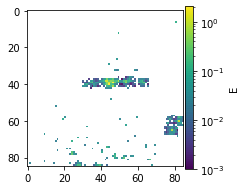

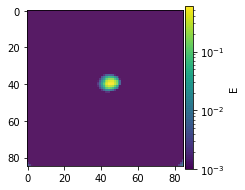

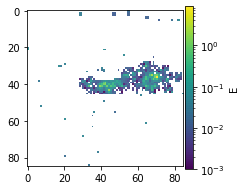

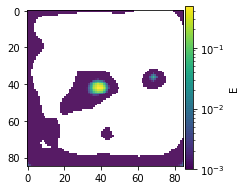

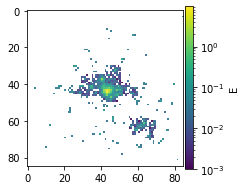

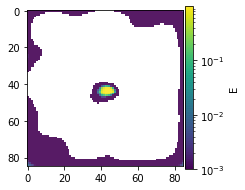

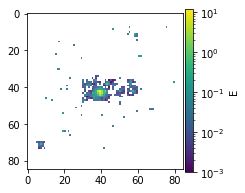

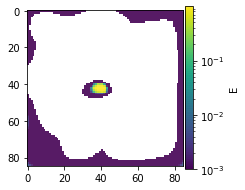

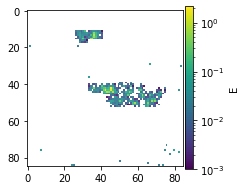

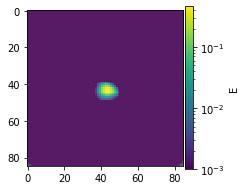

In [47]:
for i in range(5): 
    plot_img(X_test[i])
    plot_img(decoded[i])